# Linear Regression: Predicting House Rental Prices

This example parallels [Chapter 16 in Inferential Thinking](https://inferentialthinking.com/chapters/16/Inference_for_Regression.html)

In [67]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

**The following description is copied from this [Kaggle dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/data)**

### Context
The spectrum of housing options in India is incredibly diverse, spanning from the opulent palaces once inhabited by maharajas of yore, to the contemporary high-rise apartment complexes in bustling metropolitan areas, and even to the humble abodes in remote villages, consisting of modest huts. This wide-ranging tapestry of residential choices reflects the significant expansion witnessed in India's housing sector, which has paralleled the upward trajectory of income levels in the country. According to the findings of the Human Rights Measurement Initiative, India currently achieves 60.9% of what is theoretically attainable, considering its current income levels, in ensuring the fundamental right to housing for its citizens. In the realm of housing arrangements, renting, known interchangeably as hiring or letting, constitutes an agreement wherein compensation is provided for the temporary utilization of a resource, service, or property owned by another party. Within this arrangement, a gross lease is one where the tenant is obligated to pay a fixed rental amount, and the landlord assumes responsibility for covering all ongoing property-related expenses. The concept of renting also aligns with the principles of the sharing economy, as it fosters the utilization of assets and resources among individuals or entities, promoting efficiency and access to housing solutions for a broad spectrum of individuals.

### Content
Within this dataset, you will find a comprehensive collection of data pertaining to nearly 4700+ available residential properties, encompassing houses, apartments, and flats offered for rent. This dataset is rich with various attributes, including the number of bedrooms (BHK), rental rates, property size, number of floors, area type, locality, city, furnishing status, tenant preferences, bathroom count, and contact information for the respective point of contact.

### Dataset Glossary (Column-Wise)
* BHK: Number of Bedrooms, Hall, Kitchen.
* Rent: Rent of the Houses/Apartments/Flats.
* Size: Size of the Houses/Apartments/Flats in Square Feet.
* Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
* Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
* Area Locality: Locality of the Houses/Apartments/Flats.
* City: City where the Houses/Apartments/Flats are Located.
* Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
* Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
* Bathroom: Number of Bathrooms.
* Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [68]:
# Load the Data
house = Table().read_table('House_Rent_Dataset.csv')
house

Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [69]:
house.stats()

statistic,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
min,2022-04-13,1,1200,10,1,Built Area,"Beeramguda, Ramachandra Puram, NH 9",Bangalore,Furnished,Bachelors,1,Contact Agent
max,2022-07-11,6,3.5e+06,8000,Upper Basement out of 9,Super Area,whitefield,Mumbai,Unfurnished,Family,10,Contact Owner
median,,2,16000,850,,,,,,,2,
sum,,9890,1.66079e+08,4.59171e+06,,,,,,,9330,


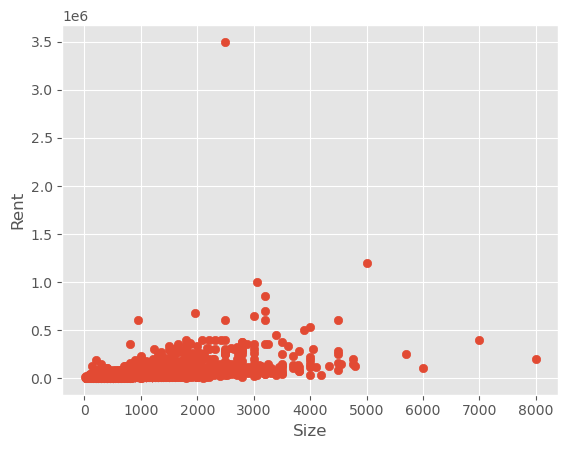

In [70]:
# Explore likely predictor of rental price: the size of the house
plt.scatter(house['Size'], house['Rent'])
plt.xlabel('Size')
plt.ylabel('Rent');

In [71]:
np.unique(house.column('City'))

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype='<U9')

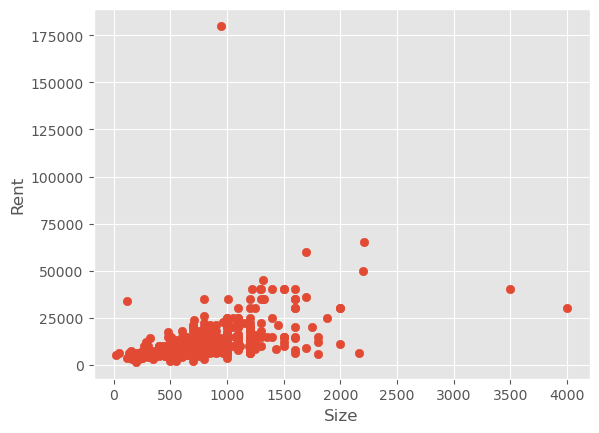

In [72]:
# Choose a particular city. Prices probably vary by city.
kolkata = house.where('City', are.equal_to('Kolkata'))
plt.scatter(kolkata['Size'], kolkata['Rent'])
plt.xlabel('Size')
plt.ylabel('Rent');

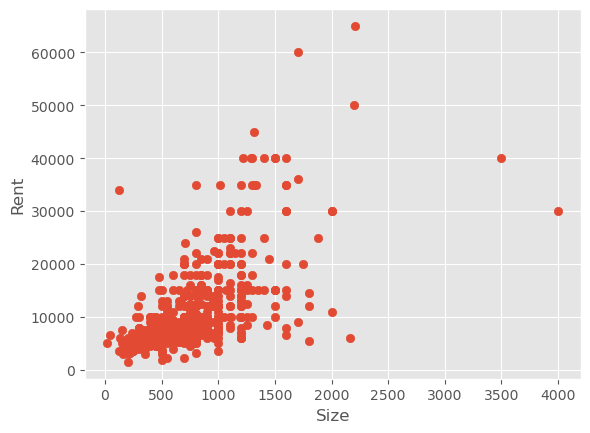

In [73]:
# Remove the one extreme outlier. 
# Though it might be interesting to know why this small a house rents to high
kolkata = kolkata.where('Rent', are.below(100000))
plt.scatter(kolkata['Size'], kolkata['Rent'])
plt.xlabel('Size')
plt.ylabel('Rent');

Clearly, there is a positive relationship between house size and rental price.

In [74]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz)) / np.std(xyz)


def correlation(t, label_x, label_y):
    return np.mean(
        standard_units(t.column(label_x)) * standard_units(t.column(label_y))
    )


# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r * np.std(t.column(label_y)) / np.std(t.column(label_x))


def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y) * np.mean(
        t.column(label_x)
    )

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [75]:
# Find the correlation coefficient
correlation(kolkata, "Size", "Rent")

0.62484626885646188

Slope: 12.44 Intercept:  1530.46


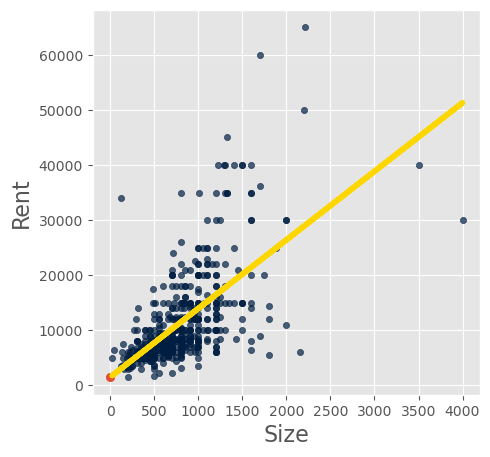

In [76]:
kolkata.scatter('Size', 'Rent')
slp = slope(kolkata, 'Size', 'Rent')
inter = intercept(kolkata,'Size','Rent')
print("Slope: %4.2f Intercept:  %4.2f" % (slp, inter))
plt.scatter(0,inter)
plt.plot(kolkata.column('Size'), fit(kolkata, 'Size', 'Rent'), lw=4, color='gold')
plt.show()

## Bootstrap to find the confidence interval for the slope

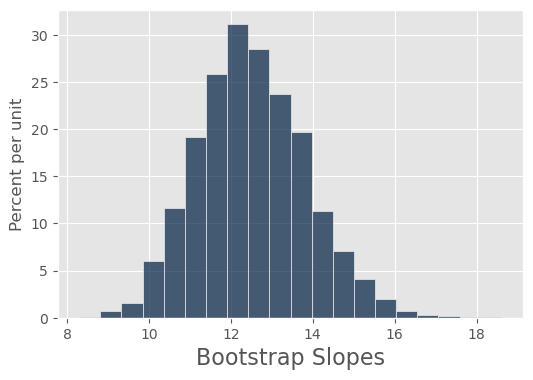

In [77]:
slopes = make_array()
for i in np.arange(5000):
    bootstrap_sample = kolkata.sample()
    bootstrap_slope = slope(bootstrap_sample, 'Size', 'Rent')
    slopes = np.append(slopes, bootstrap_slope)
Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

## Find the 95% interval

In [78]:
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)
left, right

(10.077500824263241, 15.293760034286706)

## Prediction Interval

Suppose we want to know the price we would predict for a house size of 1500 sq ft, along with the 95% confidence interval.

In [79]:
def fitted_value(table, x, y, given_x):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * given_x  + b

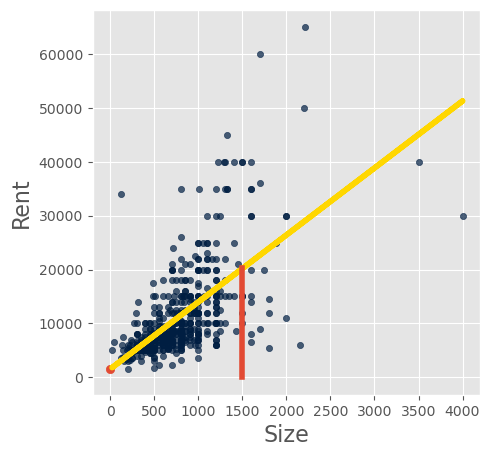

In [80]:
kolkata.scatter('Size', 'Rent')
slp = slope(kolkata, 'Size', 'Rent')
plt.scatter(0,inter)
plt.plot(kolkata.column('Size'), fit(kolkata, 'Size', 'Rent'), lw=4, color='gold')
plt.plot([1500, 1500], [0, fitted_value(kolkata, 'Size', 'Rent', 1500)], lw=4)
plt.show()

In [81]:
# Bootstrap prediction of variable y at new_x
# Data contained in table; prediction by regression of y based on x
# repetitions = number of bootstrap replications of the original scatter plot

def bootstrap_prediction(table, x, y, new_x, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter; 
    # get the regression prediction at new_x; 
    # augment the predictions list
    predictions = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_prediction = fitted_value(bootstrap_sample, x, y, new_x)
        predictions = np.append(predictions, bootstrap_prediction)
        
    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)
    
    # Prediction based on original sample
    original = fitted_value(table, x, y, new_x)
    
    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plt.xlabel('predictions at x='+str(new_x))
    plt.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Height of regression line at x='+str(new_x)+':', original)
    print('Approximate 95%-confidence interval:')
    print(left, right)

Height of regression line at x=1500: 20193.9715813
Approximate 95%-confidence interval:
18172.3716331 22654.2037719


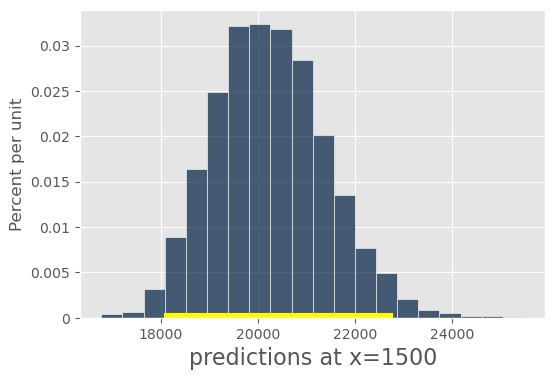

In [82]:
bootstrap_prediction(kolkata, 'Size', 'Rent', 1500, 5000)

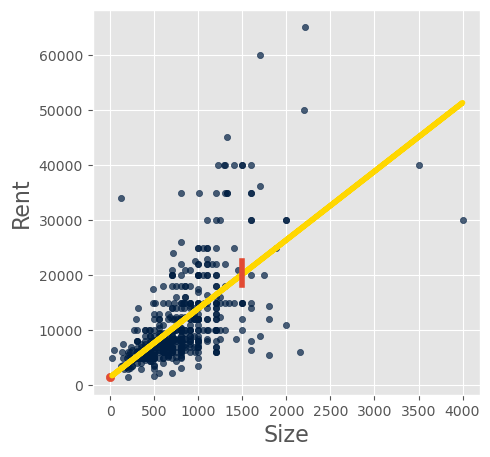

In [83]:
kolkata.scatter('Size', 'Rent')
slp = slope(kolkata, 'Size', 'Rent')
plt.scatter(0,inter)
plt.plot(kolkata.column('Size'), fit(kolkata, 'Size', 'Rent'), lw=4, color='gold')
plt.plot([1500, 1500], [18172., 22654.], lw=4)
plt.show()